### What are we talking about

[source notebook](https://www.kaggle.com/code/mvvppp/hms-eda-and-domain-journey)

[associated paper](https://www.acns.org/UserFiles/file/ACNSStandardizedCriticalCareEEGTerminology_rev2021.pdf)

**Goal**: Detect AND Classify types of harmful brain activity.

There are six patterns of interest for this competition: seizure (SZ), generalized periodic discharges (GPD), lateralized periodic discharges (LPD), lateralized rhythmic delta activity (LRDA), generalized rhythmic delta activity (GRDA), or “other”. 

**How brain activity is recorded?**

Electroencephalography, commonly referred to as EEG, is a non-invasive method used to record electrical activity in the brain. This technique involves placing electrodes on the scalp, which detect tiny electrical charges that result from the activity of brain cells. The signals captured by these electrodes are amplified and recorded, typically resulting in a series of wavy lines that are analyzed by specialists.

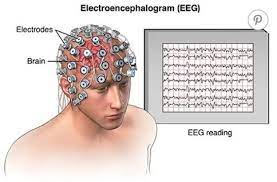

**How electroencephalography data looks like?**

Electroencephalography (EEG) data typically appears as a series of wavy lines, each representing the electrical activity recorded from different electrodes placed on the scalp. These lines, called traces, show the voltage changes over time. The patterns observed in EEG data are influenced by the brain activity of the individual, and they can vary significantly depending on the state of consciousness, activity, or any neurological conditions.

**What are we looking for in these data?**

We are looking for patterns such as:

**Wave Patterns**: EEG data is characterized by different types of wave patterns, such as alpha, beta, delta, and theta waves. Each type corresponds to different brain states. For example, alpha waves are often associated with a state of relaxation, while beta waves are linked with active thinking or concentration.

**Amplitude and Frequency**: The waves have varying amplitudes (heights) and frequencies (speeds). The amplitude indicates the strength of the signal, and frequency shows how fast the brain waves are oscillating.

**Artifacts**: These are non-brain waveforms that can appear in the data due to muscle movements, eye blinks, or electrical interference.

**Abnormal Patterns**: In cases of neurological disorders like epilepsy, the EEG may show spikes, sharp waves, or other unusual patterns that indicate abnormal brain activity.

**How spectrograms related to EEG?**

Spectrograms are closely related to EEG in the context of analyzing and visualizing the frequency spectrum of brain waves over time. A spectrogram is a visual representation of the spectrum of frequencies of a signal as they vary with time. In the case of EEG data, a spectrogram can provide valuable insights into the frequency content of the brain's electrical activity.

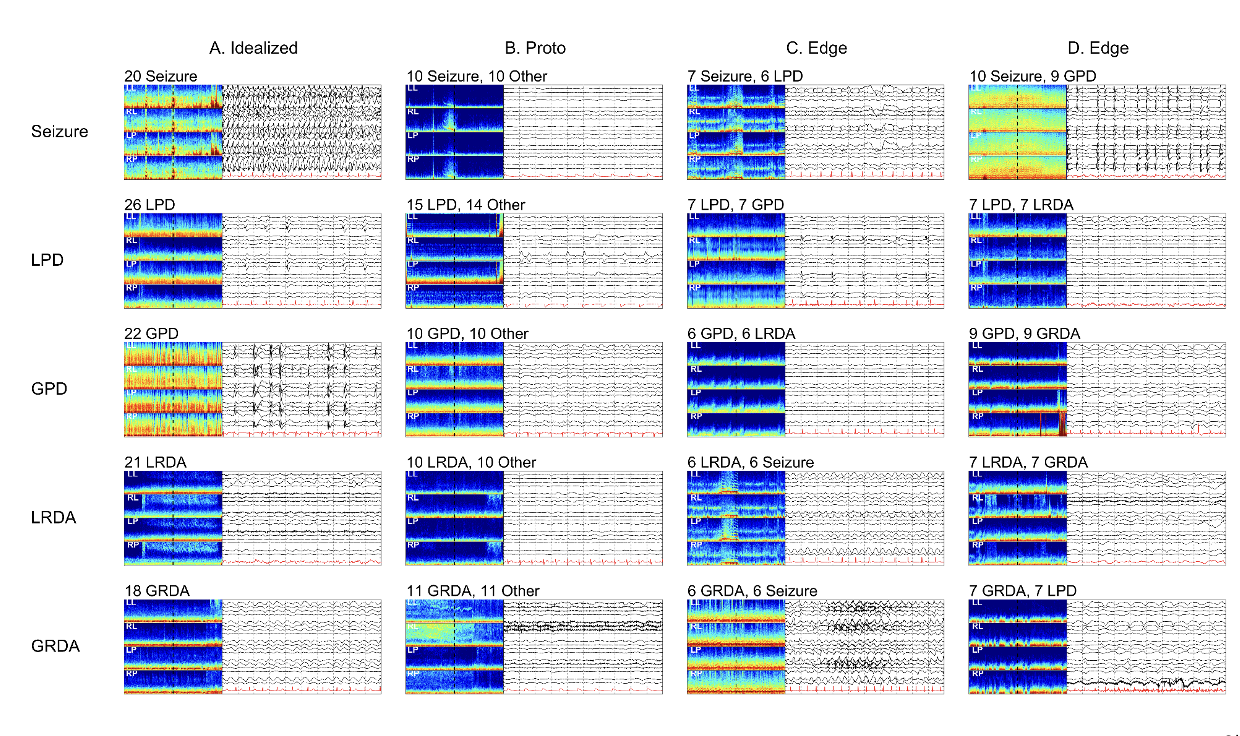

**How spectrograms are used in relation to EEG?**

**Frequency Analysis**: EEG signals consist of brain waves with different frequencies, like alpha, beta, theta, and delta waves. A spectrogram can visually display these frequencies, showing how they change over time during the EEG recording.

**Identifying Patterns**: Spectrograms can help in identifying patterns that might not be easily discernible in the raw EEG waveforms. For example, they can be used to detect changes in brain activity during different sleep stages, or to identify oscillatory activity associated with certain neurological disorders, like epilepsy.

**Temporal and Frequency Resolution**: A key advantage of spectrograms in EEG analysis is their ability to provide information about both the timing (temporal resolution) and the frequency (frequency resolution) of brain waves. This is crucial for understanding dynamic changes in brain activity.

**Data Visualization**: Spectrograms offer a more intuitive way to visualize and interpret complex EEG data. They can transform the EEG's time-domain data into a more accessible frequency-domain representation, which can be easier to analyze and understand, especially in research and clinical diagnostics.

**What is LPD/GPD/LRDA/GRDA conditions and how they may be seen in data?**

**1-/ Lateralized Periodic Discharges (LPDs)** are typically associated with acute or subacute brain dysfunction, often related to structural brain lesions or acute brain injuries. LPDs are of particular interest in the field of neurology and are often investigated in patients with acute neurological symptoms such as seizures or altered mental status.

**Lateralization**: LPDs are lateralized, meaning they predominantly occur on one side (hemisphere) of the brain.

**Periodicity**: LPDs are periodic, meaning they display a repeating pattern. This periodicity is a key feature in their identification on an EEG.

**Waveform Characteristics**: LPDs typically consist of sharp waveforms or complexes that are clearly distinguishable from the background EEG activity. These sharp waves are usually followed by a slow-wave component.

**General Characteristics**: In EEG data, LPDs appear as regular, sharply contoured waveforms that stand out against the background brain activity and repeat at consistent intervals. They are usually unilateral, affecting either the left or right hemisphere, which is an important aspect in their interpretation.

**2-/ Generalized Periodic Discharges (GPDs)** are EEG patterns often associated with diffuse or generalized brain dysfunction. These discharges can be linked to various neurological conditions, ranging from toxic-metabolic encephalopathies to severe diffuse brain injuries. GPDs are of significant interest in clinical neurophysiology and neurology, particularly in the context of diagnosing and managing patients with altered consciousness or comatose states.

**Generalized Distribution**: GPDs are characterized by their distribution across both hemispheres of the brain, rather than being localized to one side.

**Periodicity**: Like LPDs, GPDs exhibit a repeating pattern. Their periodic nature is crucial for their identification on EEG and distinguishes them from other generalized EEG abnormalities.

**Waveform Characteristics**: GPDs usually consist of repetitive, sharply contoured waveforms that can vary in shape and duration. They are often more synchronized compared to other EEG patterns.

**Clinical Implications**: GPDs may be seen in various clinical scenarios, including severe diffuse brain injury, hypoxic-ischemic encephalopathy, and in association with certain drug toxicities or metabolic derangements. Their presence can indicate a severe underlying brain dysfunction.

**3-/ Lateralized Rhythmic Delta Activity (LRDA)** refers to a particular EEG pattern characterized by rhythmic, slow-wave activity, typically in the delta frequency range, and is usually localized to one hemisphere.

**Lateralization**: The key feature of LRDA is its lateralized nature, affecting predominantly one hemisphere of the brain, which can be crucial in localizing a neurological lesion or dysfunction.

**Rhythmic Delta Waves**: Unlike the sharp waveforms of LPDs, LRDA is defined by smoother, more rhythmic waveforms, predominantly in the delta frequency range (1-4 Hz).

**Clinical Context**: LRDA is often observed in patients with focal brain lesions, such as those caused by stroke, tumors, or inflammation. It may also be seen in the context of focal seizure activity.

**Interpretation**: The presence of LRDA in an EEG reading can provide valuable information regarding the location and possibly the nature of brain pathology, aiding in diagnosis and treatment planning.


**4-/ Generalized Rhythmic Delta Activity (GRDA)** is an EEG pattern characterized by rhythmic delta activity that is distributed more uniformly across both hemispheres of the brain.

**Generalized Distribution**: GRDA differs from LRDA in that it is not lateralized but involves both hemispheres, often symmetrically.

**Rhythmic Delta Waves**: This pattern is defined by continuous or quasi-continuous rhythmic delta waves. The activity is slower and more rhythmic compared to GPDs.

**Associated Conditions**: GRDA can be seen in various clinical conditions, including encephalopathies of different etiologies (like toxic-metabolic disturbances), and in some cases, during certain sleep stages or in diffuse brain disorders.

**Diagnostic Significance**: The presence of GRDA can be indicative of a global brain dysfunction and may warrant further investigation to identify its cause. It is particularly significant in assessing patients with altered levels of consciousness or diffuse neurological impairments.

### Inports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### - A look at the data

In [4]:
train = pd.read_csv("data/train.csv")
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [6]:
test = pd.read_csv("data/test.csv")
test.head()

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


###### - Class distribution

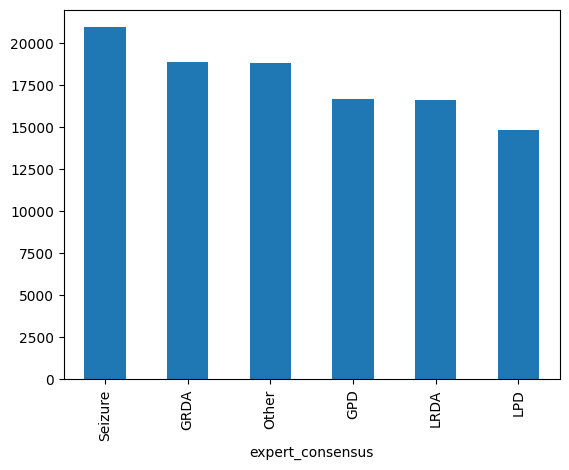

In [7]:
train["expert_consensus"].value_counts().plot(kind='bar');


###### - Number of different patient



In [8]:
print(f"Number of patients: {train['patient_id'].nunique()}")


Number of patients: 1950


###### - Inspect offset seconds number


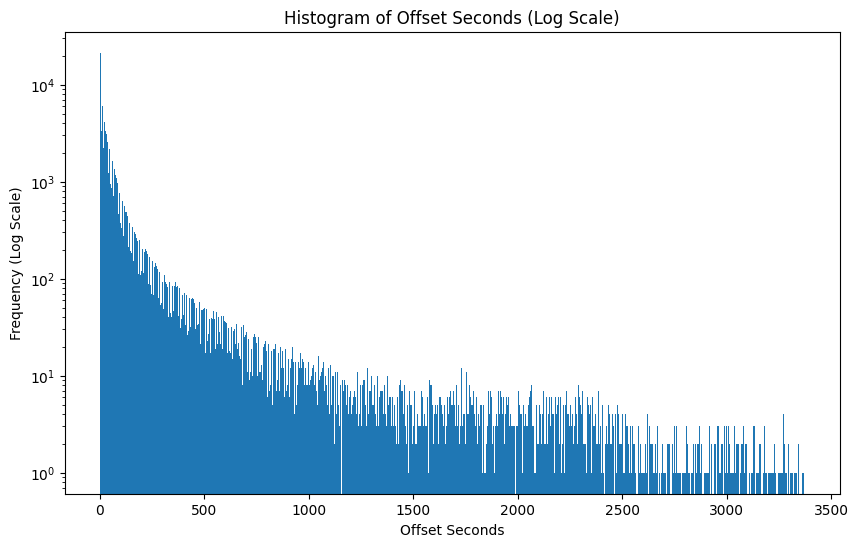

In [9]:
plt.figure(figsize=(10,6))
plt.hist(train['eeg_label_offset_seconds'], bins='auto', log=True)
plt.xlabel('Offset Seconds')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Offset Seconds (Log Scale)')
plt.show()

###### - Take a look at EEGs

In [12]:
print("Train eeg files: ")
! ls data/train_eegs | wc -l
print("Size of train eegs")
! du -sh data/train_eegs

Train eeg files: 
/usr/bin/zsh: /home/jean/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
17300
Size of train eegs
/usr/bin/zsh: /home/jean/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
18G	data/train_eegs


Take a closer look at one parquet

There are 10_000 rows and 20 columns. Each column represent value from some specific electrode, which placed on it's specific location. Rows represent values from this electrodes over time. The frequency is 200 samples (rows) per second. So, this is a result of 50-second brain activity tracking.

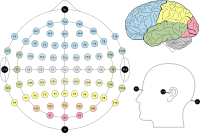

In [33]:
sample_train_eeg = pd.read_parquet("data/train_eegs/1000913311.parquet")
sample_train_eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117


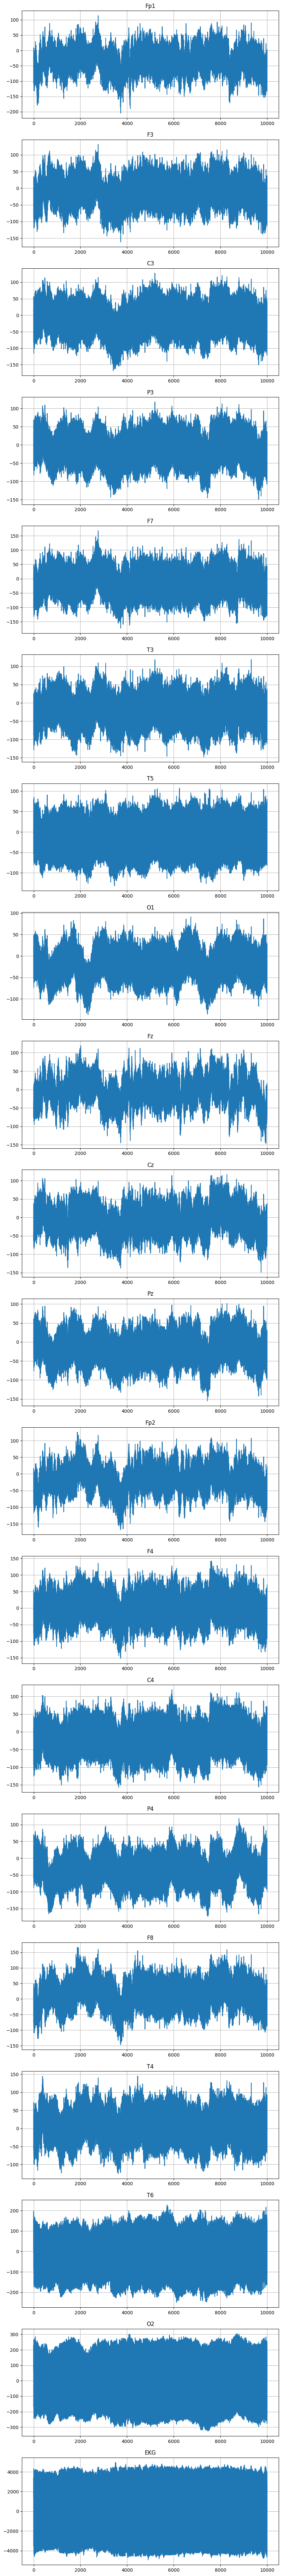

In [34]:
fig, ax = plt.subplots(20, figsize=(10, 100))

# Generate a line plot for each column in the DataFrame
for i, column in enumerate(sample_train_eeg.columns):
    ax[i].plot(sample_train_eeg.index, sample_train_eeg[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))


plt.show()

###### - Take a look at spectrograms


The spectrogram data file contains a set of frequencies over time for 4 measurements:

- LL
- RL
- RP
- LP

In [21]:
sample_train_spectrogram = pd.read_parquet("data/train_spectrograms/1000086677.parquet")
sample_train_spectrogram.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,28.680000,53.990002,67.629997,59.880001,50.880001,74.309998,78.480003,63.080002,59.869999,...,0.13,0.14,0.08,0.11,0.04,0.03,0.05,0.05,0.04,0.05
1,3,29.639999,38.959999,44.009998,66.800003,48.509998,42.180000,47.340000,48.599998,40.880001,...,0.15,0.13,0.08,0.08,0.07,0.06,0.07,0.06,0.06,0.06
2,5,8.890000,9.020000,16.360001,23.559999,27.340000,30.040001,27.559999,23.290001,15.120000,...,0.12,0.11,0.08,0.08,0.09,0.10,0.12,0.14,0.13,0.14
3,7,1.770000,1.930000,1.810000,1.600000,1.430000,1.280000,1.190000,1.110000,1.010000,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def plot_spectrogram(spectrogram_path):
    sample_spect = pd.read_parquet(spectrogram_path)
    
    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])
    plt.tight_layout()
    plt.show()

/home/jean/miniconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


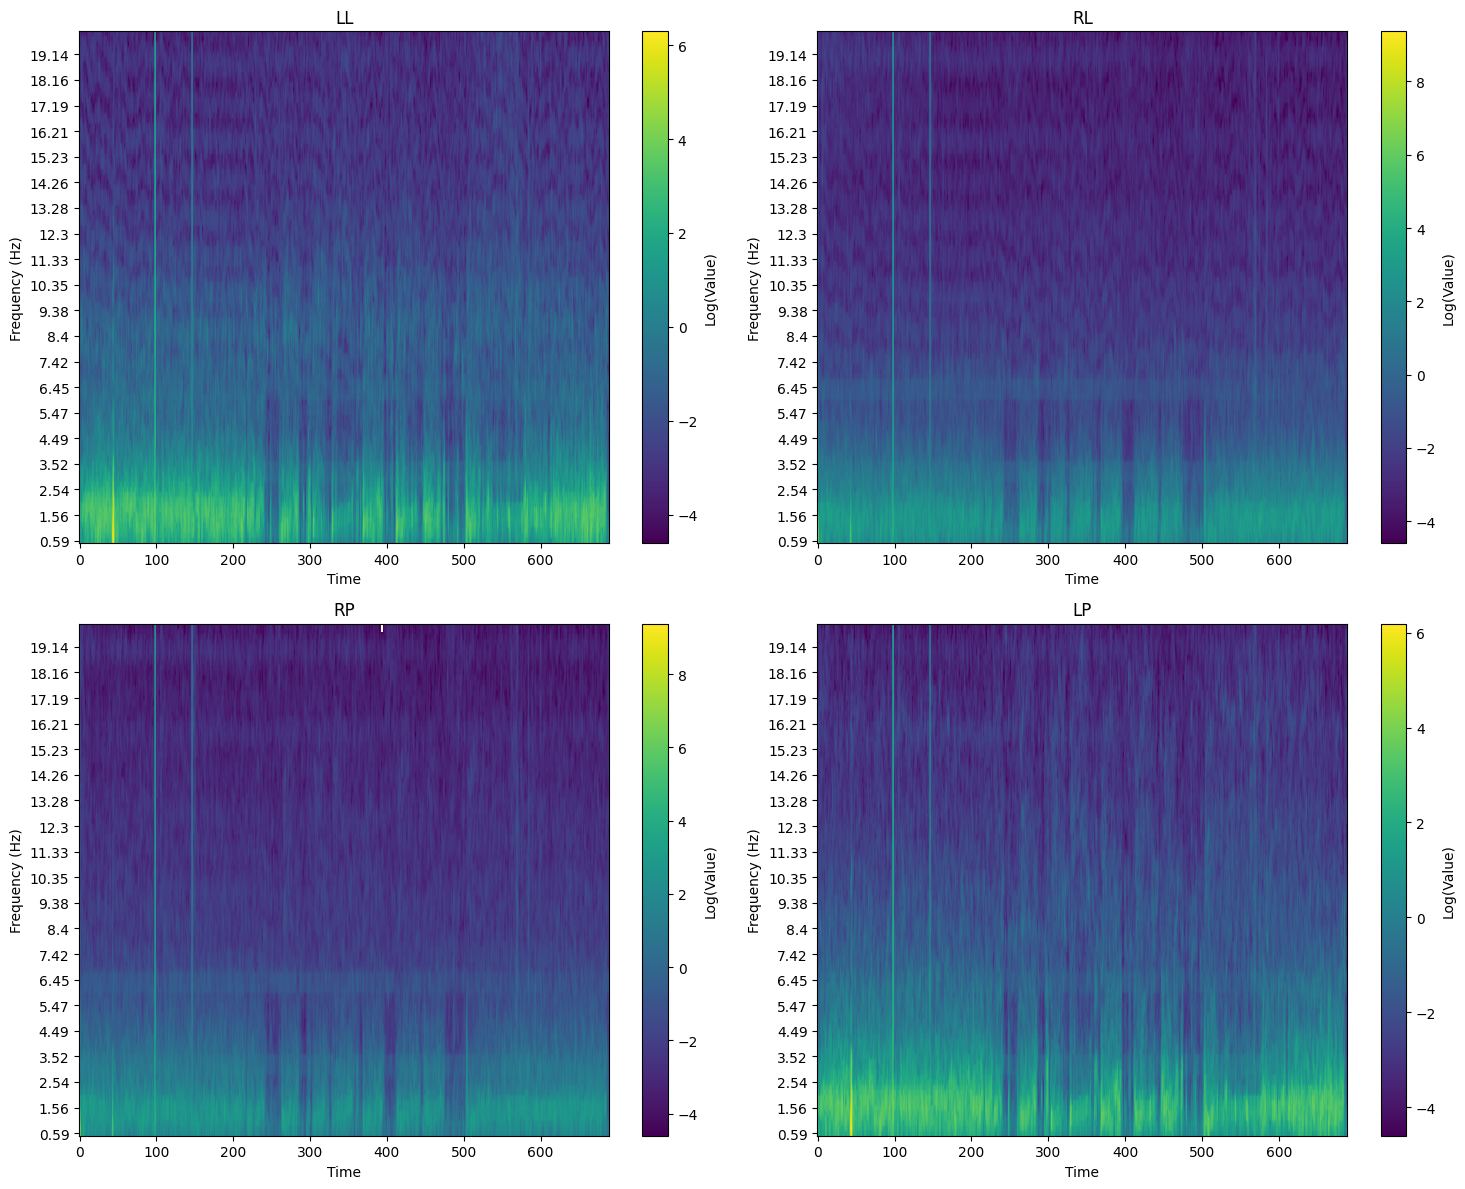

In [22]:
plot_spectrogram("data/train_spectrograms/1000189855.parquet")